# Ampliación de Matemáticas. Curso 2022-23.
## Máster INO, ETSI Navales, UPM

## Control 3.

### Nombre y apellidos: 

Marca una X a continuación de la opción de calificación que eliges (por defecto se asume la primera):

- Quiero hacer únicamente el control 3 (bloque 3):
- Quiero hacer los controles 1 y 3 (bloques 1,3):
- Quiero hacer los controles 2 y 3 (bloques 2,3):
- Quiero hacer todo el examen: **X**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import scipy.linalg as la
import scipy.integrate as integ
from scipy.optimize import root, bisect
from scipy.interpolate import lagrange, CubicSpline

# Primer bloque (3 p.)

## Apartado 1.1 (1,5 p.)

La distancia $R$ recorrida por una bola de masa $m = 1$ Kg al ser disparada al aire desde la superficie con un ángulo $0\leq \theta \leq \pi/2$ con respecto a la horizontal y una velocidad inicial $v_0$ es (si no se tienen en cuenta los efectos debidos a la resistencia debida al aire):
$$
R = \frac{v_0^2\sin(2\theta)}{g},
$$
donde $g=9.80665$ m/s$^2$ es la aceleración debida al efecto de la gravedad. Este esquema muestra la situación cuando $\theta=\pi/6$ es treinta grados:
![](Disparo.png) 

Queremos calcular el ángulo $\theta$ con el que hay que lanzar el proyectil para que alcance un objetivo situado a $R=80$ m. La velocidad $v_0$ con la que lo lanzamos nos viene dada. 

- Reescribe este problema como un problema consistente en hallar los valores de una cierta función que cumplen
$$f(\theta)=R.$$
- Representa gráficamente dicha función para los valores de $v_0= 20, 30, 40, 50, 60$ ¿Cuántas soluciones hay y donde se situan aproximadamente?
- A la vista de las gráficas anteriores, ¿es posible utilizar el método de la bisección para aproximar las soluciones de $f(\theta)=R$ sea cual sea el valor de $v_0$? Utiliza el método de la bisección para calcular el/los ángulo(s) pedidos en el caso $v_0= 40$.
- Utiliza las ideas anteriores para representar la gráfica de la función $\theta(v_0)$ que a un valor de la velocidad inicial $v_0$ le asigna el menor de los ángulos posibles que permiten alcanzar el objetivo para los valores de $v_0$ comprendidos entre $30$ y $50$. 

> El problema es equivalente a hallar los $\theta$ tales que
>$$
f(\theta)=R,\quad\text{siendo }f(\theta)=\frac{v_0^2\sin(2\theta)}{g}.
$$

In [2]:
g  = 9.80665
R  = 80
v0 = 50

# definimos f(theta)

def f(theta):
    return (v0**2) * np.sin(2*theta)/g

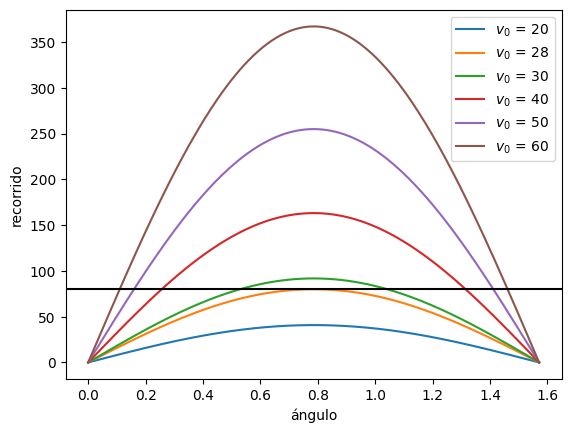

In [3]:
th_eval = np.linspace(0, np.pi/2, 200)

for v in (20, 28, 30, 40 , 50, 60):
    v0 = v
    plt.plot(th_eval, f(th_eval), label='$v_0$ = %d'%v)

plt.axhline(y =  R, color = 'k')
plt.xlabel('ángulo')
plt.ylabel('recorrido')
plt.legend()
plt.show()

> Observamos que hay un valor de $v_0$ en torno a $28$ m/s para el que hay un único valor de $\theta$ tal que $f(\theta)=80$. Si $v_0$ es inferior a dicho valor, no hay valores de $\theta$ para los que $f(\theta)=80$. Si $v_0$ es superior, entonces hay exactamente dos valores de $\theta$, entre $0$ y $\pi/2$ tales que $f(\theta)=80$.   En este último caso podemos utilizar el método de la bisección. 

In [4]:
def f2(x, v):
    return (v**2) * np.sin(2*x)/g - R

print('Los valores de theta cuando la velocidad es 40 m/2 son: ', 
      bisect(f2, 0, np.pi/4, args = 40), bisect(f2, np.pi/4, np.pi/2, args = 40))

Los valores de theta cuando la velocidad es 40 m/2 son:  0.25623561129743044 1.3145607154974663


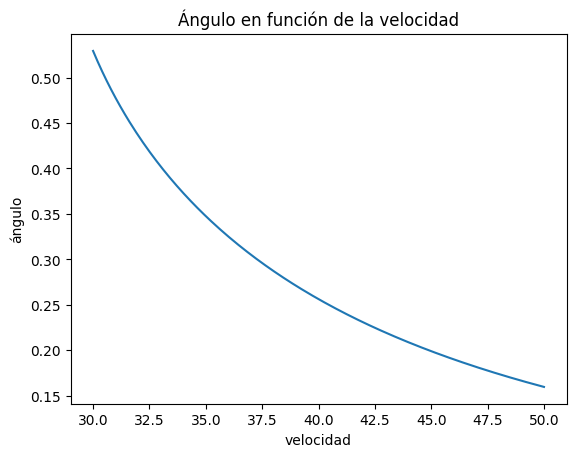

In [5]:
def invf2(v):
    # esta función calcula la raíz más pequeña de f(theta)-R con velocidad v
    ts = np.zeros_like(v)
    for j in range(len(v)):
        ts[j] = bisect(f2, 0, np.pi/4, args = v[j])
    return ts

v_eval = np.linspace(30, 50, 200)

plt.title('Ángulo en función de la velocidad')
plt.plot(v_eval, invf2(v_eval))
plt.xlabel('velocidad')
plt.ylabel('ángulo')
plt.show()

> Como se puede observar, cuanto mayor es la velocidad, menor podemos tomar el ángulo de tiro.

## Apartado 1.2 (1,5 p.)

Consideramos ahora el experimento siguiente. Dejamos caer verticalmente una bola de platino de masa $8.9849 ·10^{-5}$ Kg en una columna de mercurio. 
Medimos la profundidad a la que está la bola cada segundo $t_0=0, t_1=1, t_2=2 \dots $hasta llegar a los $10$ segundos. Obtenemos los siguiente datos:

`[0, -1.6319, -5.9141, -12.1189, -19.7184, -28.3298, -37.6751, -47.5530, -57.8171, -68.3614, -79.1090]`

Nuestro objetivo es estimar la velocidad límite (también conocida como velocidad final), que resulta del régimen en que las fuerzas de resistencia debida a la fricción igualan a las producidas por la gravedad y la bola pasaría a moverse con esa velocidad constante. Dicha velocidad de alcanza después de un periodo transitorio desde que la bola inicia su movimiento desde el estado de reposo.

- Produce una figura que contenga las gráficas del polinomio interpolador y la spline cúbica por esos datos.
- Produce una figura que contenga las gráficas de los polinomios aproximadores de grados $1,2,3$ correspondientes a esos datos. ¿Cual ajusta mejor los datos?
- Repite el ejercicio anterior considerando únicamente las profundidades correspondientes a los tres últimos segundos.
- Produce una estimación de la velocidad de caída utilizando los datos obtenidos en los dos últimos apartados. ¿Cual de las dos aproximaciones crees que es mejor? Razona tu respuesta.

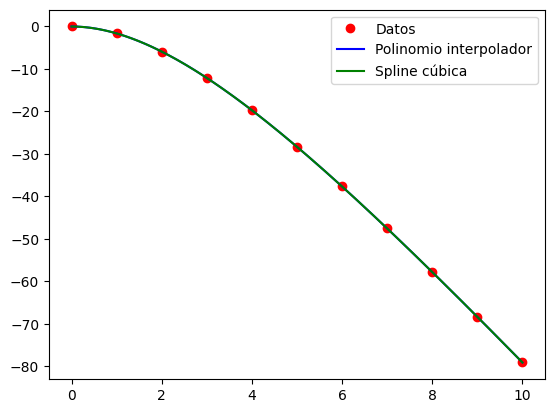

In [6]:
Tf = 10
ts = np.linspace(0, Tf, 11)
ds = [0, -1.6319, -5.9141, -12.1189, -19.7184, -28.3298, -37.6751, -47.5530, -57.8171, -68.3614, -79.1090]

cint = np.polyfit(ts, ds, 10)
cs3  = CubicSpline(ts, ds)

t_eval = np.linspace(0, Tf, 200)
pint = np.polyval(cint, t_eval)


plt.plot(ts, ds, 'ro', label = 'Datos')
plt.plot(t_eval, pint, 'b-', label = 'Polinomio interpolador')
plt.plot(t_eval, cs3(t_eval), 'g-', label = 'Spline cúbica')
plt.legend()
plt.show()


Los coeficientes del polinomio de grado  1  son:  [-8.24542636  8.66088636]
Los coeficientes del polinomio de grado  2  son:  [-0.44870944 -3.75833196  1.93024476]
Los coeficientes del polinomio de grado  3  son:  [ 0.045717   -1.13446439 -1.14331974  0.28443287]


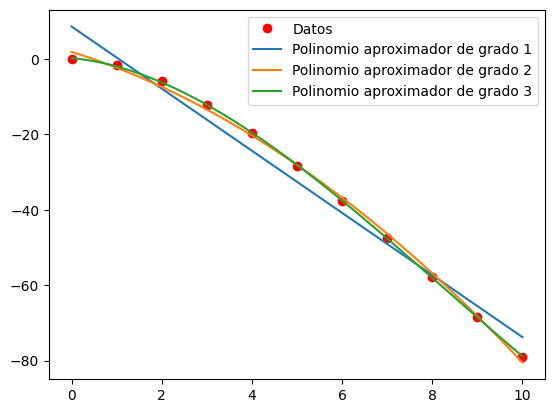

In [7]:
t_eval = np.linspace(0, Tf, 200)
plt.plot(ts, ds, 'ro', label = 'Datos')

for d in (1,2,3):
    cs = np.polyfit(ts, ds, d)
    ps = np.polyval(cs, t_eval)
    print('Los coeficientes del polinomio de grado ',d,' son: ', cs)
    plt.plot(t_eval, ps, label = 'Polinomio aproximador de grado %d'%d)

plt.legend()
plt.show()

>Pese a que las gráficas son muy parecidas, parece que el polinomio de grado uno basta para capturar la tendencia de los datos, al menos desde $t=5$. Esto es coherente con la física del problema: a medida que la bola va hundiéndose, su velocidad se acerca a una velocidad límite. En la práctica podemos asumir que la velocidad es constante.

Los coeficientes del polinomio de grado  1  son:  [-10.64595     27.38438333]
Los coeficientes del polinomio de grado  2  son:  [-0.10165 -8.81625 19.2185 ]
Los coeficientes del polinomio de grado  3  son:  [ 0.0154944  -0.51999876 -5.06660552  8.06253294]


/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


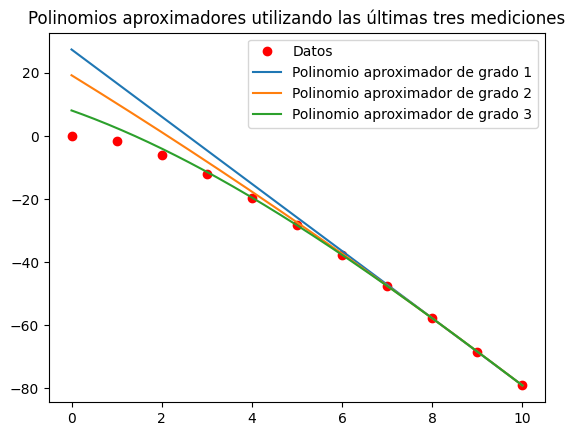

In [8]:

t_eval = np.linspace(0, Tf, 200)
plt.title('Polinomios aproximadores utilizando las últimas tres mediciones')
plt.plot(ts, ds, 'ro', label = 'Datos')

for d in (1,2,3):
    cs = np.polyfit(ts[8:], ds[8:], d)
    ps = np.polyval(cs, t_eval)
    print('Los coeficientes del polinomio de grado ',d,' son: ', cs)
    plt.plot(t_eval, ps, label = 'Polinomio aproximador de grado %d'%d)

plt.legend()
plt.show()

>En este caso es más claro que el polinomio de grado uno capta mejor la tendencia. Los coeficientes de grado superior a uno son relativamente más pequeños que el de grado uno.

In [9]:
cs = np.polyfit(ts[8:], ds[8:], 1)
print('Una estimación de la velocidad la proporciona el coeficiente del término de grado uno del polinomio aproximador: ', cs[0])

Una estimación de la velocidad la proporciona el coeficiente del término de grado uno del polinomio aproximador:  -10.645950000000008


> Indicamos como curiosidad como se deduce la velocidad exacta. La velocidad como función del tiempo satisface:
>$$
m\dot{v_y} = -mg_{\mathrm{eff}} - cv_y,\qquad v_y(0)=0,
$$
>donde $c$ denota el coeficiente de resistencia dado por la ley de Stokes:
>$$
c = 6\pi \mu r,
$$
>siendo $r$ el radio de la bola y $\mu$ el coeficiente de viscosidad dinámica ($r=10^{-3}$ y $\mu = 1.53·10^{-3}$ en este caso).
>De aquí se sigue que:
>$$
v_y(t)=\frac{g_{\mathrm{eff}}}{\lambda}(e^{-\lambda t}-1),\quad \lambda=c/m.
$$
>Si la posición inicial es $y(0)=0$ resulta:
>$$
y(t)=-\frac{g_{\mathrm{eff}}}{\lambda}t + \frac{g_{\mathrm{eff}}}{\lambda^2}(1-e^{-\lambda t}).
$$
La velocidad límite no es más que 
$$
v= -\frac{g_{\mathrm{eff}}}{\lambda} = -\frac{g_{\mathrm{eff}}m}{6\pi\mu r}.
$$

Velocidad límite exacta 11.2808522875817


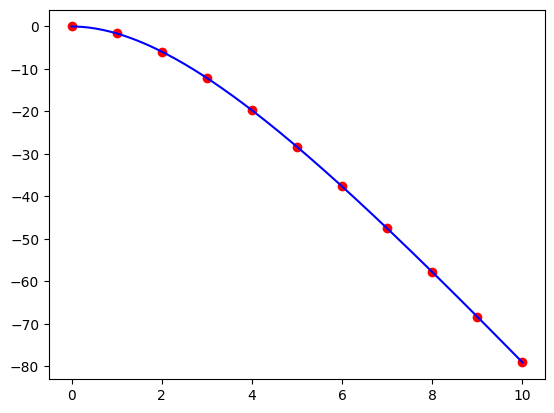

In [10]:
# Viscosity  of Hg (Pa.s)
mu = 1.53e-3
# Density 
rho_Pt, rho_Hg = 21450, 13530
# Radius and mass of the sphere
r = 1.e-3   # radius (m)
m = 4*np.pi/3 * r**3 * rho_Pt
# Drag consant from Stokes' Law:
c = 6 * np.pi * mu * r
# Final measurement time
Tf = 10

lam = c/m
g  = 9.80665
gp = g*(1 - rho_Hg/rho_Pt)

# exact depth 

def depth(t):
    return gp/lam**2 * (1 - lam*t - np.exp(-lam*t))

t_eval = np.linspace(0, Tf, 200)


print('Velocidad límite exacta', gp/lam)

plt.plot(ts, ds, 'ro')
plt.plot(t_eval, depth(t_eval), 'b-')
plt.show()


# Segundo bloque (3 p.)

## Apartado 2.1 (1.5 p.)

Una bola de masa $m = 0.25$ Kg se dispara al aire con un ángulo inicial $\theta$ de treinta grados con respecto a la horizontal con velocidad $v_0$ m/s según este esquema:

![](Disparo.png) 

Tenemos en cuenta la resistencia debida al aire, que viene dada por $C_D v^{3/2}$ 
siendo 
$$ v = \sqrt{v_1^2+v_2^2}$$
y la velocidad de la bola $(v_1(t),v_2(t))$ viene descrita por las ecuaciones:

$$ \dot{v}_1 = - \frac{C_D}{m} v^{1/2}v_1 ,\quad \dot{v}_2 = - \frac{C_D}{m} v^{1/2}v_2 -g,$$



Tomamos $C_D = 0.3$ Kg/(m·s)$^{1/2}$ y $g=9.80665$ m/s$^2$, $v(0)=v_0=100$.


- ¿Cuales son los datos iniciales del sistema? 
- Produce dos figuras que contengan respectivamente la gráfica de la  primera componente de la velocidad, la de la segunda componente para tiempos comprendidos entre $0$ y $3$.

Las coordenadas de la velocidad inicial son:
$$
v_1(0)=v_0\cos\theta=100\cos \pi/6,\quad v_2(0)=v_0\sin\theta=100\sin \pi/6.
$$

In [11]:
C = 0.3
g = 9.80665
m = 0.25

def F(t,ys):
    vx, vy = ys
    v = (vx**2 + vy**2)**(1/4)
    return [
        -C/m*vx*v, 
        -C/m*vy*v-g
    ]

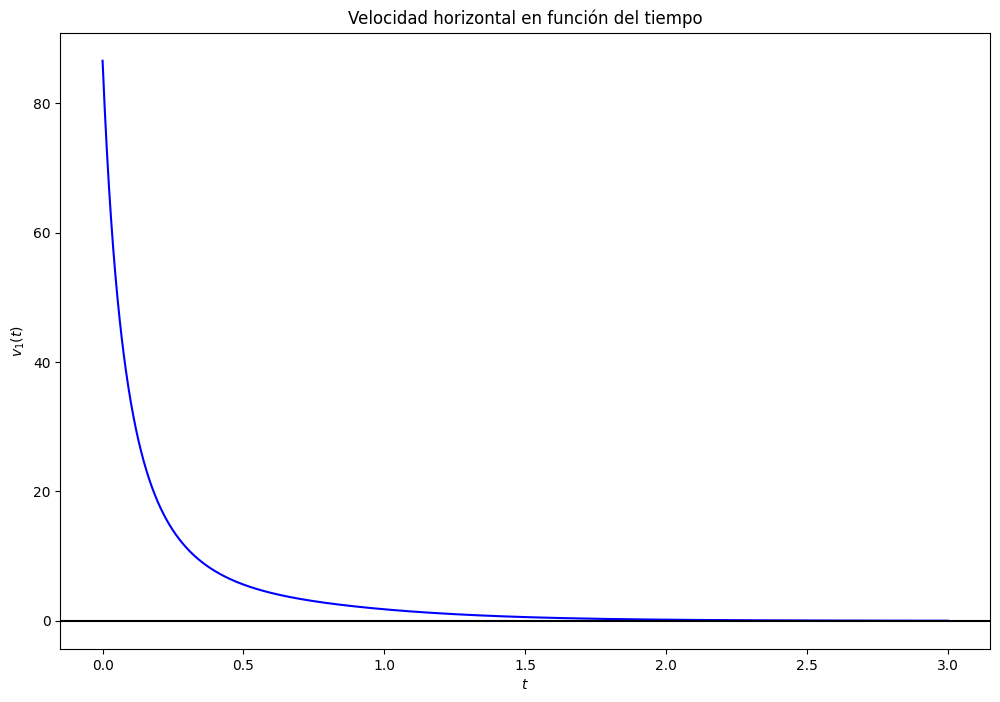

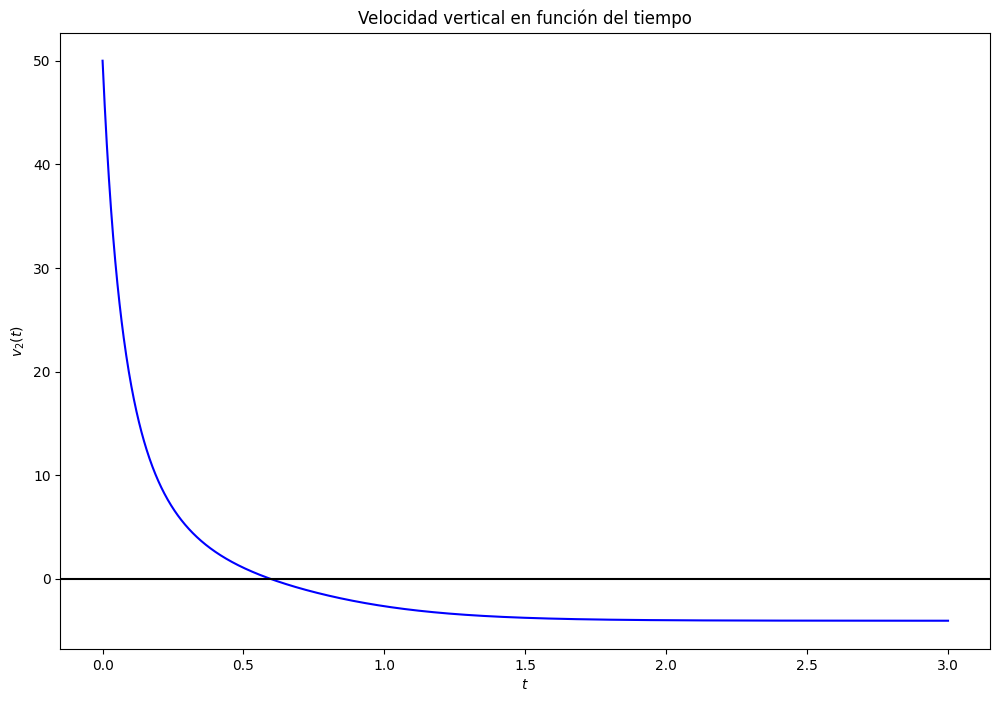

In [12]:
t0,tf = t_span = [0,3]
mv0 = 100 # módulo de la velocidad
theta = np.pi/6 # ángulo de tiro
v0 = [mv0*np.cos(theta), mv0*np.sin(theta)] # velocidad inicial

ts = np.linspace(t0,tf,2000)

sol = integ.solve_ivp(
    F, t_span, v0, 
    method='RK45', t_eval = ts, rtol=1e-7
)

ts = sol['t']
vx = sol['y'][0,:]
vy = sol['y'][1,:]

plt.figure(figsize=(12,8))
plt.plot(ts, vx, 'b')
plt.xlabel('$t$')
plt.ylabel('$v_1(t)$')
plt.axhline(c='k')

plt.title('Velocidad horizontal en función del tiempo')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(ts, vy, 'b')
plt.xlabel('$t$')
plt.ylabel('$v_2(t)$')
plt.axhline(c='k')

plt.title('Velocidad vertical en función del tiempo')
plt.show()


## Apartado 2.2 (1,5 p.)

Vamos a calcular la posición $(x(t), y(t))$ de la bola del apartado anterior asumiendo que se dispara desde el origen $(0,0)$. Para ello calcularemos numéricamente las integrales:
$$
x(t)=\int_0^t v_1(s)ds,\quad y(t)=\int_0^t v_2(s)ds.
$$
- Calcula la posición en el instante $t=3$ con los datos iniciales del apartado anterior utilizando la regla de Simpson compuesta.
- Construye una función que dado un array de tiempos devuelva un array con las dos coordenadas de la posición en ese array de tiempos. Utilízala para representar gráficamente la trayectoria de la bola entre $t=0$ y $t=3$.
- La posición se puede calcular directamente resolviendo un problema de valor inicial para un sistema de ecuaciones diferenciales ordinarias. Escribre dicha ecuación, resuélvela numéricamente y compara el resultado con el obtenido en la pregunta anterior.

In [13]:
# posicion en t=3

x = integ.simpson(vx, ts)
y = integ.simpson(vy, ts)
print('La posición en t=3 es: x =', x, 'y = ',y)

La posición en t=3 es: x = 13.275524605842831 y =  -2.5801544858060685


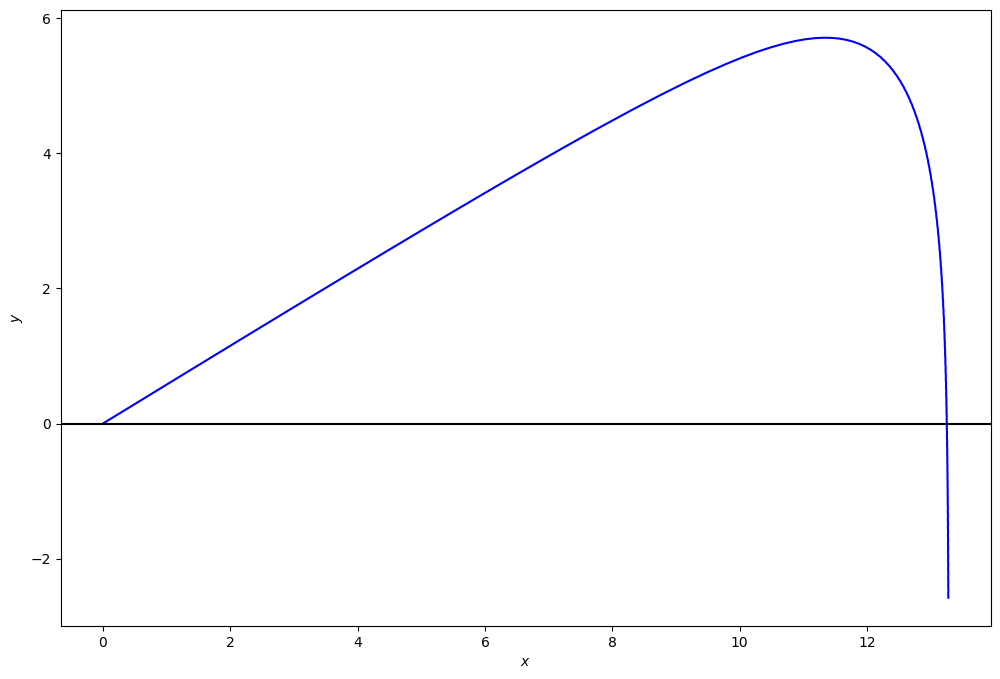

In [14]:
def pos(t, mv0, theta):
    t1 = t[0]
    t2 = t[-1]
    
    v0 = [mv0*np.cos(theta), mv0*np.sin(theta)] # velocidad inicial

    ts = np.linspace(t0,tf,2000)

    sol = integ.solve_ivp(
        F, [t1, t2], v0, 
        method='RK45', t_eval = t, rtol=1e-7
    )

    vx = sol['y'][0,:]
    vy = sol['y'][1,:]
    
    xy = np.zeros((len(t),len(t)))
    
    for k in range(len(t)):
        xy[0,k], xy[1,k] = integ.simpson(vx[:k+1], t[:k+1]), integ.simpson(vy[:k+1],t[:k+1]) 

    return xy

ts = np.linspace(0,3,200)
posicion = pos(ts, 100, np.pi/6 )
plt.figure(figsize=(12,8))
plt.plot(posicion[0,:], posicion[1,:], 'b')
plt.axhline(c='k')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Las posición $(x(t),y(t))$ cumple:
$$
\dot{x}=v_1,\quad \dot{y}=v_2,\quad \dot{v}_1 = - \frac{C_D}{m} v^{1/2}v_1 ,\quad \dot{v}_2 = - \frac{C_D}{m} v^{1/2}v_2 -g,
$$
Podemos resolver este sistema de primer orden con condición inicial:
$$
x(0)=0,\quad y(0)=0,\quad v_1(0)=100\cos(\pi/6),\quad v_2(0)=100\sin(\pi/6).
$$

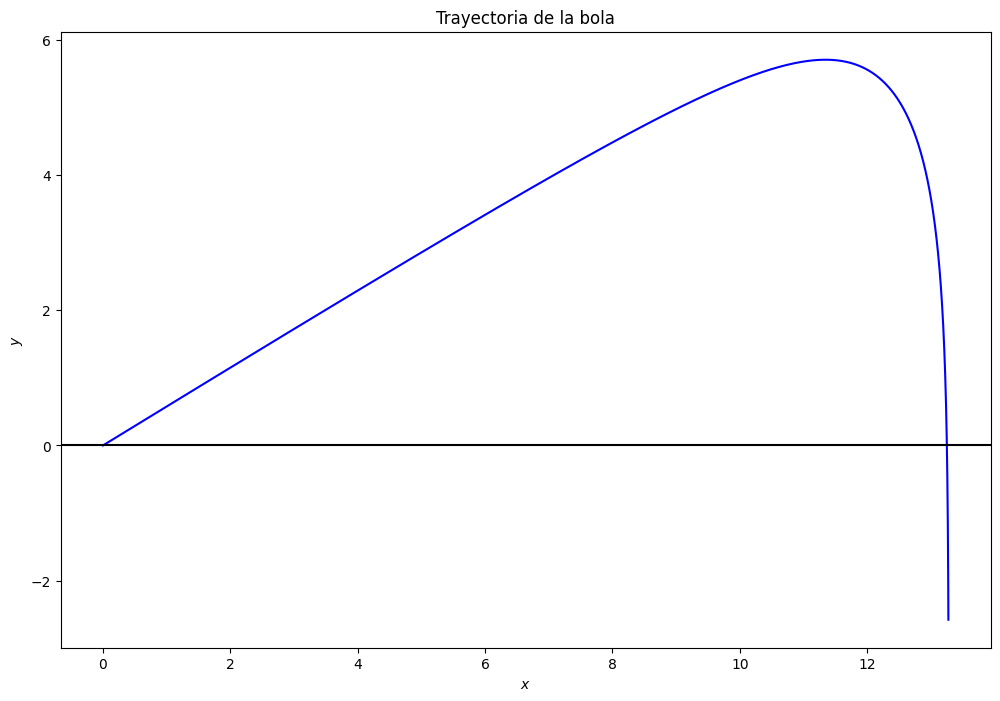

In [15]:
C = 0.3
g = 9.80665
m = 0.25

def Famp(t,ys):
    x, y, vx, vy = ys
    v = (vx**2 + vy**2)**(1/4)
    return [
        vx, 
        vy,
        -C/m*vx*v, 
        -C/m*vy*v-g
    ]

t0,tf = t_span = [0,3]
mv0 = 100 # módulo de la velocidad
theta = np.pi/6 # ángulo de tiro
y0 = [0,0,mv0*np.cos(theta), mv0*np.sin(theta)] # posición y velocidad inicial

ts = np.linspace(t0,tf,2000)

sol = integ.solve_ivp(
    Famp, t_span, y0, 
    method='RK45', t_eval = ts, rtol=1e-7
)


x = sol['y'][0,:]
y = sol['y'][1,:]

plt.figure(figsize=(12,8))
plt.plot(x, y, 'b')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(c='k')

plt.title('Trayectoria de la bola')
plt.show()



# Tercer bloque (4 p.)

## Apartado 3.1 (1.5 p.)

Vamos a estudiar un flujo laminar, estacionario e incompresible a lo largo de una tubería de sección anular, de eje $Ox$ y de radios 
$$
0<R_1<R_2.
$$
El flujo es laminar si el campo de velocidades es paralelo al eje de la tubería y únicamente es función de la distancia $r$ al eje de la tubería. Junto con la condición de incompresibilidad, esto resulta en un campo de velocidades de la forma:
$$
(u(r),0,0). 
$$
En presencia de un gradiente de presiones constantes
$$
-\frac{d P}{d x} =  G
$$
el campo de velocidades satisface las ecuaciones de Navier-Stokes:
$$
\mu \left({\frac {d ^{2}u}{d r^{2}}}+{\frac {1}{r}}{\frac {d u}{d r}}\right)=-G,\quad R_1\leq r \leq R_2,
$$
siendo $\mu$ el coeficiente de viscosidad dinámica, junto con las condiciones no-splip en las paredes de la tubería:
$$
u(R_1)=u(R_2)=0.
$$

- Supongamos que los radios de la tubería son $R_1=1$ cm y $R_2=5$ cm, que por ella fluye mercurio ($\mu = 1.53·10^{-3}$ Pa·s) y que el gradiente de presiones entre los dos extremos de la tubería es $G=20$ Pa. Resuelve el problema de contorno resultante y representa gráficamente la solución.
- Construye una función que asigne a un valor del radio mayor de la tubería $R_2$ el máximo de la velocidad del fluido. Represéntala gráficamente para valores $2 \mathrm{ cm}\leq R_2 \leq 10\mathrm{cm}$.

>Como curiosidad, indicamos que la solución exacta es:
$$ u(r) = {\frac {G}{4\mu }}\left(R_{1}^{2}-r^{2}\right)+{\frac {G}{4\mu }}\left(R_{2}^{2}-R_{1}^{2}\right){\frac {\ln r/R_{1}}{\ln R_{2}/R_{1}}}.
$$

In [16]:
mu = 1.53e-3
R1 = 1e-2
R2 = 5e-2
G  = 20

def fun(x,ys):
    y, yp = ys
    return [yp, -G/mu-yp/x]

# Las condiciones en los extremos
a, b = R1, R2
alpha, beta = 0, 0
def bc(vals_a, vals_b):
    #vals_a contains the values y(a) and y'(a)
    ya, ypa = vals_a
    #vals_b contains the values y(b) and y'(b)
    yb, ypb = vals_b
    return np.array([ya - alpha, yb - beta])

In [17]:
def u(r):
    return G/(4*mu)*(R1**2 - r**2 + (R2**2-R1**2)*np.log(r/R1)/np.log(R2/R1))

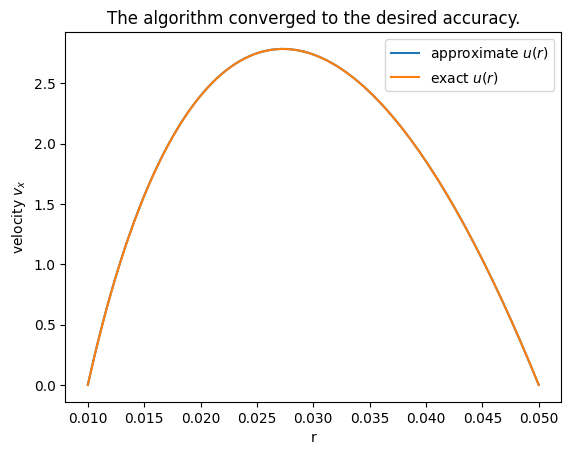

In [18]:
N = 50
xs = np.linspace(R1, R2, N)
ys = np.zeros((2, N))
sol = integ.solve_bvp(fun, bc, xs, ys, tol=1e-06)
plt.title(sol['message'])
plt.xlabel('r')
plt.ylabel('velocity $v_x$')
plt.plot(sol['x'], sol['y'][0,:], label='approximate $u(r)$')
plt.plot(xs, u(xs), label='exact $u(r)$')
plt.legend()
plt.show()

In [19]:
# construimos una función que dado R devuelve la velocidad máxima en la tubería de ancho R
def vmax(R):
    v_max = np.zeros_like(R)
    for k in range(len(R)):
        a, b = R1, R[k]
        N = 50
        xs = np.linspace(R1, R[k], N)
        ys = np.zeros((2, N))
        sol = integ.solve_bvp(fun, bc, xs, ys, tol=1e-06)
        v_max[k]=max(sol['y'][0,:])
    return v_max

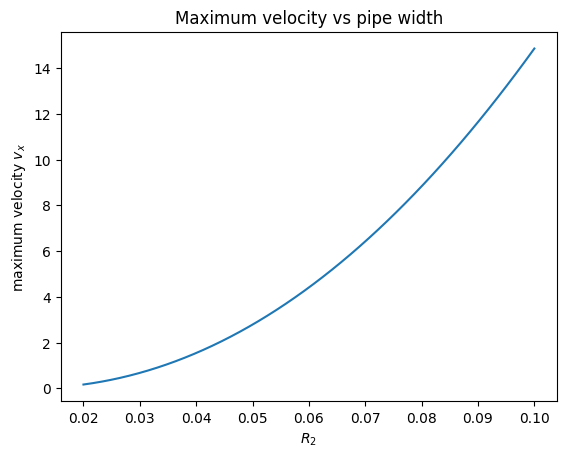

In [20]:
R_eval = np.linspace(2e-2,10e-2,50)

v_max = vmax(R_eval)

plt.xlabel('$R_2$')
plt.ylabel('maximum velocity $v_x$')
plt.title('Maximum velocity vs pipe width')
plt.plot(R_eval, v_max)
plt.show()

## Apartado 3.2 (1.5 p.)

Pasamos a estudiar el flujo laminar incompresible y estacionario creado por dos placas de longitud infinita separadas por una distancia $h>0$. Volvemos a suponer que se aplica un gradiente de presiones constante en la dirección del flujo.

Nuevamente, la componente no trivial del flujo $u(y)$ depende únicamente de la dirección perpendicular a las placas. El sistema de Navier-Stokes se reduce en este caso a:
$$
\mu \frac{d^2 u}{dy^2}(y) =  -G, \quad 0\leq y \leq h,
$$
y si suponemos condiciones de contorno no-slip, se ha de cumpir además que:
$$
u(0) = u(h) =0.
$$

- Resuelve el problema de contorno anterior utilizando el método de los elementos finitos tomando $\mu$ y $G$ como en el apartado anterior con $h=0.1$.
- Obtén analíticamente la solución exacta del problema de contorno (observa que no es más que encontrar una función que tenga derivada segunda constante y cumpla las dos condiciones de contorno). Compárala con las soluciones obtenidas con el método de elementos finitos con $N=5,10,20$ nodos.

In [21]:
from scipy.interpolate import UnivariateSpline

def FE(x1, x2, x3):
    '''Una llamada a FE nos devuelve una función lineal a trozos f
    que vale:
        - f(x1) = f(x3) = 0
        - f(x2) = 1
        - lineal en (x1, x2) y (x2, x3)
        - 0 fuera del intervalo (x1, x3)
    '''
    xdata = [x1-1, x1, x2, x3, x3+1]
    ydata = [0,0,1,0,0]
    # Interpolación lineal a trozos de xdata e ydata
    # continuada por cero entre -oo y x1, y también entre x3 y +oo
    return UnivariateSpline(xdata, ydata, k=1, s=0)

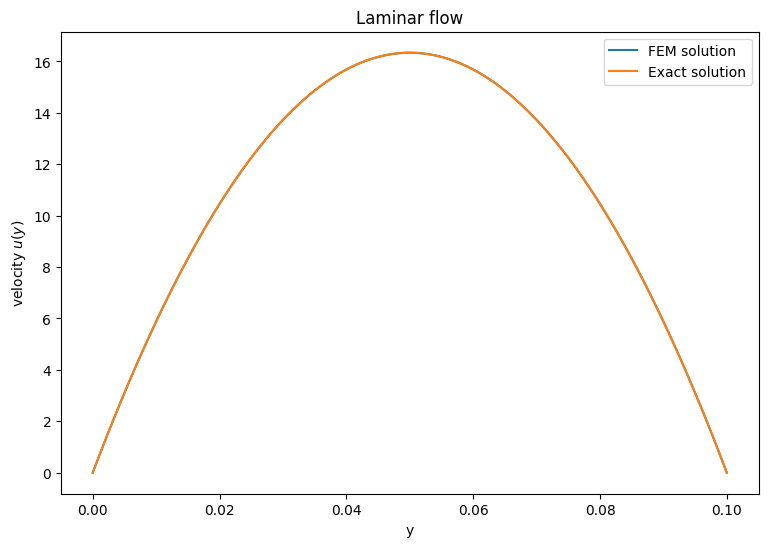

In [22]:
#Esta línea define x0, xf (números) y x_span (una lista con esos dos mismos números)
x0, xf = x_span = [0, 0.1]
alpha, beta = 0, 0

## ATENCION: vamos a escribir la ecuación en la forma
## 
##     - u''(x) + V(x)u(x) = f(x)
##     u(a)=u(b)=0
## 
## esto difiere de la sintaxis usada por solve_bvp en e la que
## se despeja u''

def V(x):
    #Devuelve un array del mismo tamaño que el array xs, toma el valor
    #constante S/(E*I)
    return np.zeros_like(x)

def f(x):
    return G/mu*np.ones_like(x)

def uex(y):
    return G/(2*mu)*y*(xf-y)

# Probamos distintos valores
n = 120

# Mallado
h = (xf - x0)/n
xs = np.linspace(x0,xf,n+1)
#puntos interiores
xs_int = xs[1:-1]

# Matriz banda A
A = np.zeros((n-1,n-1))
# Vector b
b = np.zeros(n-1)
for i in range(n-1):
    xi = xs_int[i]
    xi_menos = xi - h
    xi_mas   = xi + h
    phi_i = FE(xi_menos, xi, xi_mas)
    A[i,i] = (
#        (2/h) + integ.quad(lambda x: V(x)*phi_i(x)**2, xi_menos,xi_mas)[0]
        (2/h) + (h/12)*(V(xi_menos) + 6*V(xi) + V(xi_mas))
    )
#    b[i] = integ.quad(lambda x: f(x)*phi_i(x), xi_menos,xi_mas)[0]
    b[i] = (h/6)*(f(xi_menos) + 4*f(xi) + f(xi_mas))
    if i>0:
        phi_i_menos = FE(xi-2*h, xi-h, xi)
        A[i,i-1] = (
#        (-1/h) + integ.quad(lambda x: V(x)*phi_i(x)*phi_i_menos(x), xi_menos,xi)[0]
        (-1/h) + (h/12)*(V(xi_menos) + V(xi))
        )
    if i<n-2:
        phi_i_mas = FE(xi, xi+h, xi+2*h)
        A[i,i+1] = (
#        (-1/h) + integ.quad(lambda x: V(x)*phi_i(x)*phi_i_mas(x), xi,xi_mas)[0]
        (-1/h) + (h/12)*(V(xi) + V(xi_mas))
        )

# Solucion
y_int = la.solve(A, b)
ys_FEM = np.zeros(n+1)
# ys_FEM vale 0 en los extremos del intervalo
ys_FEM[1:-1] = y_int

plt.figure(figsize=(9,6))
plt.plot(xs,ys_FEM, label = 'FEM solution')
plt.plot(xs, uex(xs), label = 'Exact solution')
plt.xlabel('y')
plt.ylabel('velocity $u(y)$')
plt.title('Laminar flow')

plt.legend()
plt.show()

>La solución exacta se puede obtener así: como la derivada segunda de $u$ es constante:
$$
\frac{d^2 u}{dy^2}(y) =  -\frac{G}{\mu}
$$
necesariamente $u(y)$ es un polinomio de grado dos. Si además cumple $u(0)=u(h)=0$ tiene que ser de la forma:
$u(y)=Cy(y-h)$ para una constante $C$ que tiene que coincidir con la mitad de la derivada segunda de $u$. Por tanto:
$$
u(y)={\frac {G}{2\mu }}y(h-y).
$$

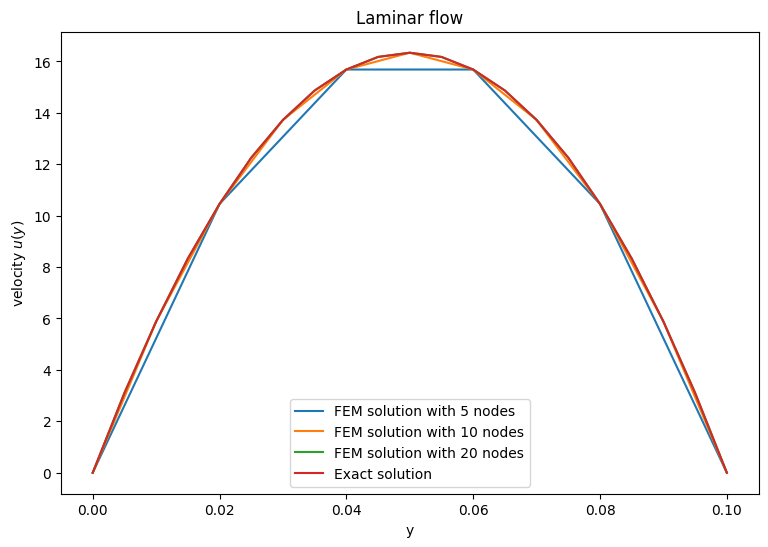

In [23]:
plt.figure(figsize=(9,6))

for n in (5, 10, 20):
    # Mallado
    h = (xf - x0)/n
    xs = np.linspace(x0,xf,n+1)
    #puntos interiores
    xs_int = xs[1:-1]

    # Matriz banda A
    A = np.zeros((n-1,n-1))
    # Vector b
    b = np.zeros(n-1)
    for i in range(n-1):
        xi = xs_int[i]
        xi_menos = xi - h
        xi_mas   = xi + h
        phi_i = FE(xi_menos, xi, xi_mas)
        A[i,i] = (
    #        (2/h) + integ.quad(lambda x: V(x)*phi_i(x)**2, xi_menos,xi_mas)[0]
            (2/h) + (h/12)*(V(xi_menos) + 6*V(xi) + V(xi_mas))
        )
    #    b[i] = integ.quad(lambda x: f(x)*phi_i(x), xi_menos,xi_mas)[0]
        b[i] = (h/6)*(f(xi_menos) + 4*f(xi) + f(xi_mas))
        if i>0:
            phi_i_menos = FE(xi-2*h, xi-h, xi)
            A[i,i-1] = (
    #        (-1/h) + integ.quad(lambda x: V(x)*phi_i(x)*phi_i_menos(x), xi_menos,xi)[0]
            (-1/h) + (h/12)*(V(xi_menos) + V(xi))
            )
        if i<n-2:
            phi_i_mas = FE(xi, xi+h, xi+2*h)
            A[i,i+1] = (
    #        (-1/h) + integ.quad(lambda x: V(x)*phi_i(x)*phi_i_mas(x), xi,xi_mas)[0]
            (-1/h) + (h/12)*(V(xi) + V(xi_mas))
            )

    # Solucion
    y_int = la.solve(A, b)
    ys_FEM = np.zeros(n+1)
    # ys_FEM vale 0 en los extremos del intervalo
    ys_FEM[1:-1] = y_int

    plt.plot(xs,ys_FEM, label = 'FEM solution with %d nodes'%n)
     
plt.plot(xs, uex(xs), label = 'Exact solution')   
plt.xlabel('y')
plt.ylabel('velocity $u(y)$')
plt.title('Laminar flow')
plt.legend()
plt.show()

## Apartado 3.3 (1 p.)

El siguiente código aproxima las soluciones de una ecuación diferencial:
```python
L  = 1
T  = 1

def IDAT(x):
    return np.piecewise(x, [x<L/3, ((x>=L/3) & (x<=2*L/3)), x>2*L/3], [0, 1, 0])

def DFM(n):
    return np.diag(np.ones(n)) - np.diag(np.ones(n-1),-1) - np.diag([1],n-1)

Nx = 100
Nt = 100
h  = L/Nx
k  = T/Nt
c  = 1.3

xs = np.linspace(0, L , Nx+1)
xs_int = xs[:-1]
u0 = IDAT(xs_int)

A = -(c/h)*DFM(Nx)

u = np.zeros((Nt+1,Nx+1)) 
u[0,:-1] = u0
for j in range(Nt):
    ut_int = u[j,:-1]
    u_new = ut_int + k*A@ut_int
    u[j+1,:-1] = u_new
u[:,Nx-1] = u[:,0]   

plt.plot(xs, u[0,:], label = 'initial datum')
plt.plot(xs, u[Nt,:], label='solution at time t=%.3f'%(Nt*k))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Approximate solution of a differential equation')
plt.show()
```

- ¿Qué ecuación diferencial resuelve este código? Especifica claramente la ecuación, el dominio en el que está planteada, las condiciones de contorno así como la condición inicial.
- ¿Qué método numérico emplea? Escribe la versión discretizada de la ecuación.
- Ejecuta el código. ¿El método ha aproximado correctamente la solución? ¿A qué es debido esto? Cambia los valores de algún(os) parámetros del código de forma que aproxime correctamente la solución.

>El código resuelve la ecuación de advección
$$\partial_tu(t,x)+c\partial_xu(t,x)=0,\quad 0\leq t\leq 1,\; 0\leq x\leq 1,$$
con $c=1.3$, con condiciones de contorno periódicas 
$$u(t,0)=u(t,1),$$
y dato inicial 
$$u(0,x)=\chi(x),$$
siendo $\chi(x)=1$ si $1/3\leq x \leq 2/3$ y $\chi(x)=0$ si $0\leq x <1/3$ o $2/3< x \leq 1$.

>La ecuación ha sido discretizada con el método upwind:
$$
\frac{u_{j}^{n+1}-u_{j}^{n}}{k}+c\frac{u_{j}^{n}-u_{j-1}^{n}}
{h}=0,\qquad n=0,\dots, N_t,\;j=0,\dots,N_x,
$$
tomando $N_t=N_x=100$ y $h=k=0,01$.

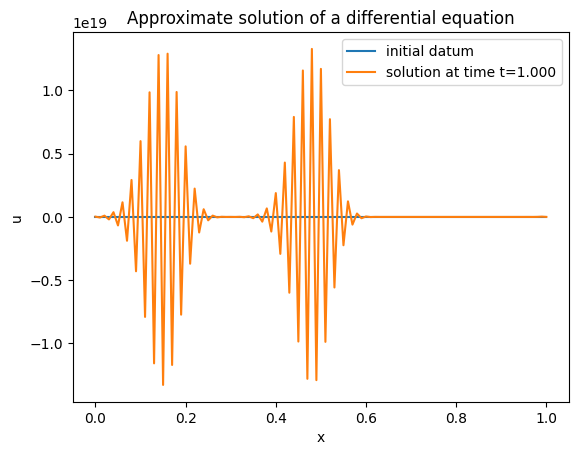

In [24]:
L  = 1
T  = 1

def IDAT(x):
    return np.piecewise(x, [x<L/3, ((x>=L/3) & (x<=2*L/3)), x>2*L/3], [0, 1, 0])

def DFM(n):
    return np.diag(np.ones(n)) - np.diag(np.ones(n-1),-1) - np.diag([1],n-1)

Nx = 100
Nt = 100
h  = L/Nx
k  = T/Nt
c  = 1.3

xs = np.linspace(0, L , Nx+1)
xs_int = xs[:-1]
u0 = IDAT(xs_int)

A = -(c/h)*DFM(Nx)

u = np.zeros((Nt+1,Nx+1)) 
u[0,:-1] = u0
for j in range(Nt):
    ut_int = u[j,:-1]
    u_new = ut_int + k*A@ut_int
    u[j+1,:-1] = u_new
u[:,Nx-1] = u[:,0]   

plt.plot(xs, u[0,:], label = 'initial datum')
plt.plot(xs, u[Nt,:], label='solution at time t=%.3f'%(Nt*k))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Approximate solution of a differential equation')
plt.show()

>El método es inestable y no converge hacia la solución exacta. Esto es debido a que el número de Courant es:
$$
\gamma = ck/h = 1,3>1.
$$
Para solucionar este problema conviene tomar $\gamma = 1$, esto se consigue tomando $N_t=130$.

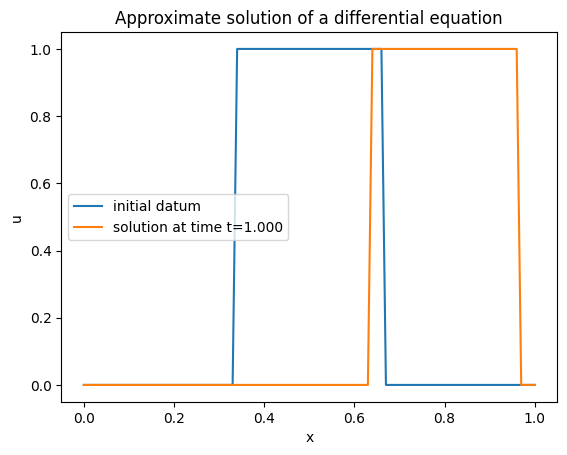

In [25]:
L  = 1
T  = 1

def IDAT(x):
    return np.piecewise(x, [x<L/3, ((x>=L/3) & (x<=2*L/3)), x>2*L/3], [0, 1, 0])

def DFM(n):
    return np.diag(np.ones(n)) - np.diag(np.ones(n-1),-1) - np.diag([1],n-1)

Nx = 100
Nt = 130
h  = L/Nx
k  = T/Nt
c  = 1.3

xs = np.linspace(0, L , Nx+1)
xs_int = xs[:-1]
u0 = IDAT(xs_int)

A = -(c/h)*DFM(Nx)

u = np.zeros((Nt+1,Nx+1)) 
u[0,:-1] = u0
for j in range(Nt):
    ut_int = u[j,:-1]
    u_new = ut_int + k*A@ut_int
    u[j+1,:-1] = u_new
u[:,Nx-1] = u[:,0]   

plt.plot(xs, u[0,:], label = 'initial datum')
plt.plot(xs, u[Nt,:], label='solution at time t=%.3f'%(Nt*k))
    
plt.legend()
plt.xlabel('x')
plt.ylabel('u')
plt.title('Approximate solution of a differential equation')
plt.show()

## Apartado 3.4 (Opcional - Extra 1 p.)

Volvemos al estudio del flujo laminar, estacionario, incompresible a lo largo de una tubería similar al descrito en el apartado 3.1. Esta vez consideramos que es de sección arbitraria $\Omega$. Como no tenemos a priori ninguna simetría, la componente de la velocidad en la dirección $Ox$ puede depender de forma general del resto de direcciones $y,z$. Dicha componente $u(y,z)$ satisface, si el gradiente de presiones es constante e igual a $-G$:
$$
\mu\left(\frac{\partial^2 u}{\partial y^2}(y,z) + \frac{\partial^2 u}{\partial z^2}(y,z)\right)=-G,\quad (y,z)\in\Omega.
$$
La condición de velocidad cero (no-slip) en las paredes de la tubería $\partial \Omega$ se refleja en:
$$
u(y,z)=0\quad (y,z)\in\partial\Omega.
$$

- Resuelve, utilizando el método de los elementos finitos, el problema anterior en el caso en que $\Omega$ es el dominio trapezoidal del cuaderno de Elementos Finidos 2D. Puedes utilizar las triangulaciones definidas ahí.

>Nos traemos el código que genera la triangulación

In [26]:
vertices = np.array([
    [0,0],
    [1,0],
    [1,1],
    [1/2,3/2],
    [0,1]
])
ivertices_boundary = np.arange(5)

triangles = np.array([
    [0,1,2],
    [0,2,4],
    [2,3,4]
])

In [27]:
from scipy.spatial import Delaunay

def refine_mesh(vertices, ivertices_boundary, triangles):
    nvertices, _ = vertices.shape
    nvertices_boundary = len(ivertices_boundary)
    nvertices_interior = nvertices - nvertices_boundary
    vertices_boundary = vertices[ivertices_boundary]
    vertices_interior = vertices[[j for j in range(nvertices)
                                  if j not in ivertices_boundary]]
    ntriangles, _ = triangles.shape
    new_nvertices_boundary = 2*nvertices_boundary
    new_ivertices_boundary = np.arange(new_nvertices_boundary)
    new_nvertices_interior = nvertices_interior + ntriangles
    
    new_vertices = np.zeros((new_nvertices_boundary + new_nvertices_interior, 2))
    new_vertices[:new_nvertices_boundary:2, :] = vertices_boundary
    for j in range(nvertices_boundary):
        iv  = ivertices_boundary[j]
        iv1 = ivertices_boundary[(j+1)%nvertices_boundary]
        new_vertices[2*j+1, :] = 0.5*(vertices[iv]+vertices[iv1])
    new_vertices[new_nvertices_boundary:new_nvertices_boundary+nvertices_interior, :] = vertices_interior
    for j in range(len(triangles)):
        triangle = triangles[j]
        v1,v2,v3 = triangle
        vbarycenter = new_nvertices_boundary+nvertices_interior+j
        barycenter = vertices[triangle].mean(axis=0)
        new_vertices[vbarycenter, :] = barycenter
    
    tri = Delaunay(new_vertices)
    new_triangles = tri.simplices
    return new_vertices, new_ivertices_boundary, new_triangles
    

In [28]:
vertices2, ivertices_boundary2, triangles2 = refine_mesh(vertices, ivertices_boundary, triangles)
vertices3, ivertices_boundary3, triangles3 = refine_mesh(vertices2, ivertices_boundary2, triangles2)
vertices4, ivertices_boundary4, triangles4 = refine_mesh(vertices3, ivertices_boundary3, triangles3)
vertices5, ivertices_boundary5, triangles5 = refine_mesh(vertices4, ivertices_boundary4, triangles4)
vertices6, ivertices_boundary6, triangles6 = refine_mesh(vertices5, ivertices_boundary5, triangles5)


>Nos traemos el código que implementa el método de elementos finitos

In [29]:
def solve_FEM(vs, ivsb, ts, f, g=None):
    nvs, _ = vs.shape
    nvsb = len(ivsb)
    ivs = np.arange(nvs)

    A = np.zeros((nvs,nvs))
    # Vector b
    b = np.zeros(nvs)
    for triangle in ts:
        P = np.ones((3,3))
        P[:,:2] =vs[triangle,:]
        # Calcula el área
        area = la.det(P)/2
        G = la.inv(P)[:2,:]
        #https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#integer-array-indexing
        A[np.ix_(triangle, triangle)] += G.transpose()@G*area

        for iv in triangle:
            vertex = vs[iv]
            #Usamos una regla de integración de orden 1
            b[iv] += (area/3)*f(vertex)

    # boundary data
    # Equations for boundary vertices are I*cs_boundary = gs_boundary
    b[ivsb] = [g(x,y) for x,y in vs[ivsb,:]] if g else 0
    #https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#integer-array-indexing
    A[np.ix_(ivsb, ivs)] = 0
    A[np.ix_(ivsb, ivsb)] = np.eye(nvsb)
    return la.solve(A, b)

>Resolvemos, cambiando el segundo miembro `f(xs)` por el del problema de Poiseuille, que es la constante $G/\mu$.

Text(0.5, 1.0, 'solución por elementos finitos con 37 nodos')

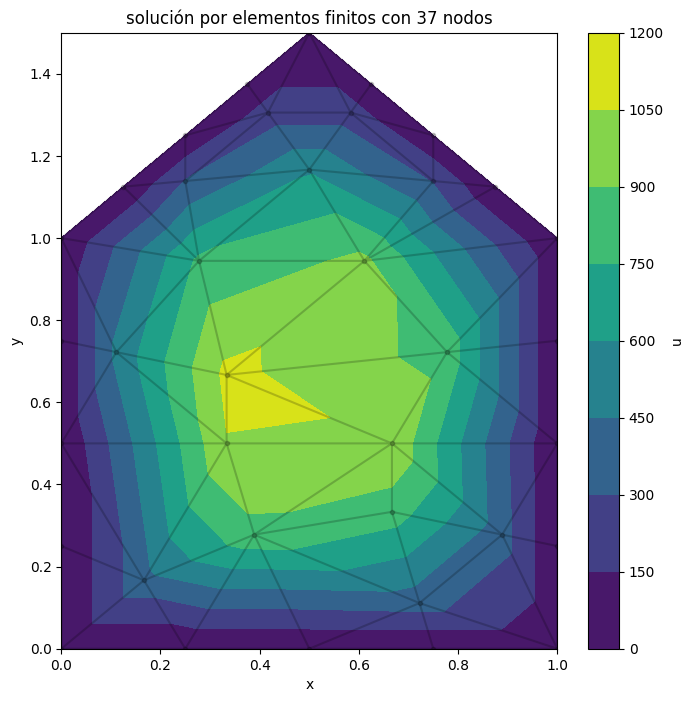

In [30]:
import matplotlib.tri as mtri

def f(xs):
    return G/mu

vs = vertices3
ivsb = ivertices_boundary3
ts = triangles3
cs = solve_FEM(vs, ivsb, ts, f)

plt.figure(figsize=(8,8))
triangulation = mtri.Triangulation(vs[:,0], vs[:,1], ts)
CS = plt.tricontourf(triangulation, cs)
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('u')
plt.triplot(vs[:,0], vs[:,1], ts, 'k.-', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('solución por elementos finitos con %d nodos'%len(vs))

Text(0.5, 1.0, 'solución por elementos finitos con 109 nodos')

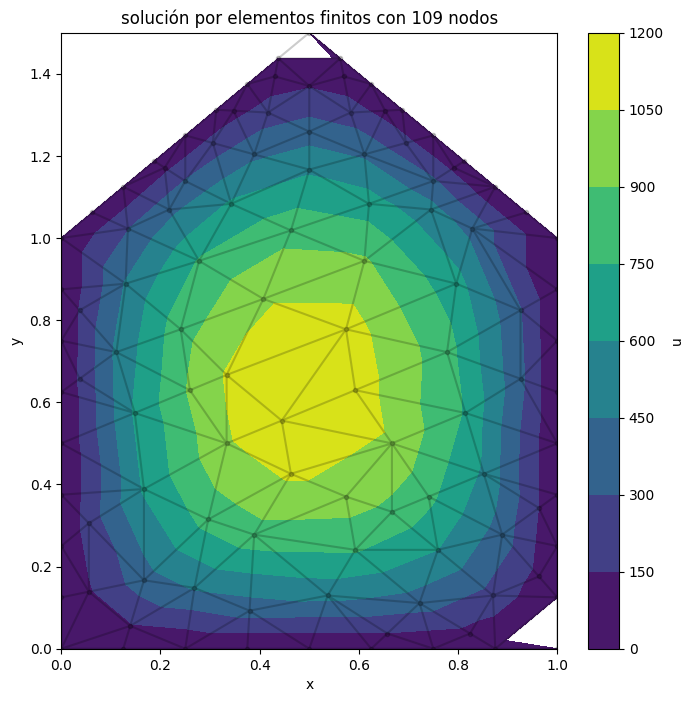

In [31]:
vs = vertices4
ivsb = ivertices_boundary4
ts = triangles4
cs = solve_FEM(vs, ivsb, ts, f)

plt.figure(figsize=(8,8))
triangulation = mtri.Triangulation(vs[:,0], vs[:,1], ts)
CS = plt.tricontourf(triangulation, cs)
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('u')
plt.triplot(vs[:,0], vs[:,1], ts, 'k.-', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('solución por elementos finitos con %d nodos'%len(vs))

Text(0.5, 1.0, 'solución por elementos finitos con 325 nodos')

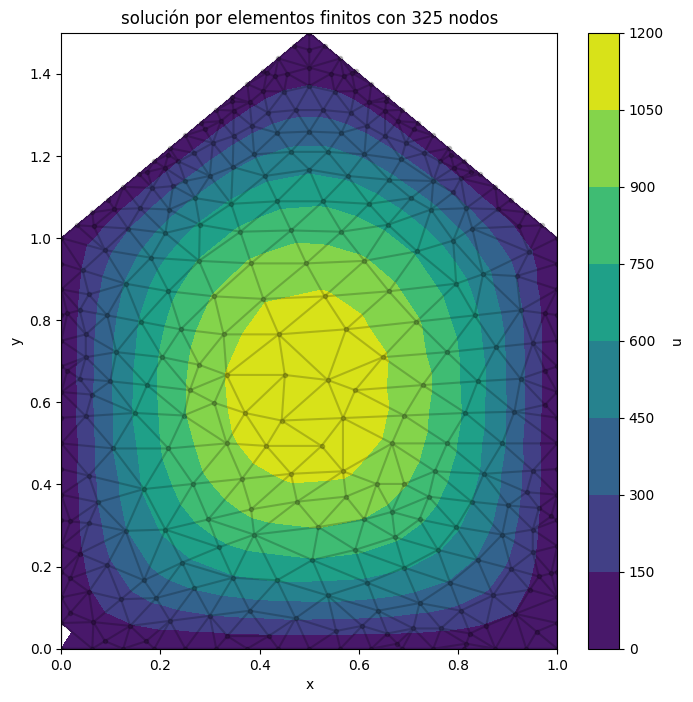

In [32]:
vs = vertices5
ivsb = ivertices_boundary5
ts = triangles5
cs = solve_FEM(vs, ivsb, ts, f)

plt.figure(figsize=(8,8))
triangulation = mtri.Triangulation(vs[:,0], vs[:,1], ts)
CS = plt.tricontourf(triangulation, cs)
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('u')
plt.triplot(vs[:,0], vs[:,1], ts, 'k.-', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('solución por elementos finitos con %d nodos'%len(vs))

Text(0.5, 1.0, 'solución por elementos finitos con 973 nodos')

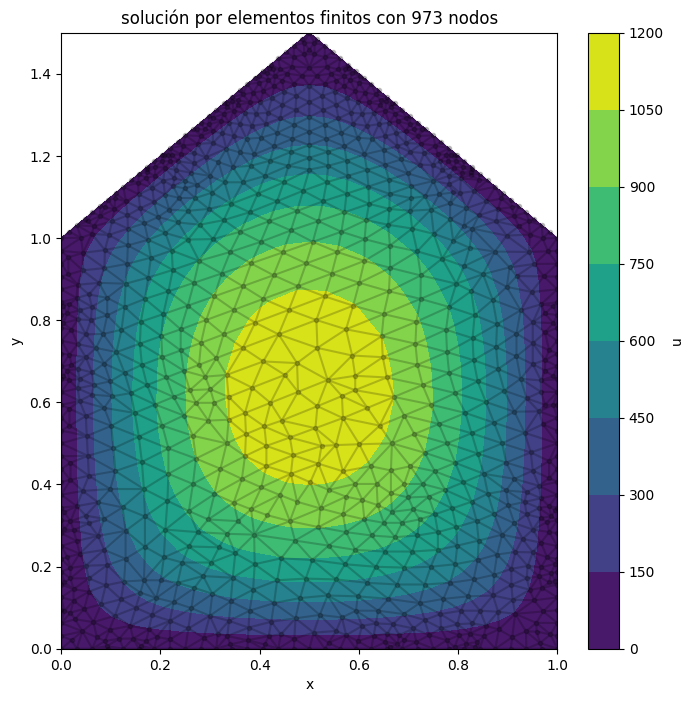

In [33]:
vs = vertices6
ivsb = ivertices_boundary6
ts = triangles6
cs = solve_FEM(vs, ivsb, ts, f)

plt.figure(figsize=(8,8))
triangulation = mtri.Triangulation(vs[:,0], vs[:,1], ts)
CS = plt.tricontourf(triangulation, cs)
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('u')
plt.triplot(vs[:,0], vs[:,1], ts, 'k.-', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('solución por elementos finitos con %d nodos'%len(vs))